# Практическая работа 9

In [1]:
import warnings

warnings.filterwarnings('ignore')

## Задание 1

Загрузить данные: `insurance.csv`.
Вывести и провести предобработку.
Вывести список уникальных регионов.

In [2]:
import pandas as pd

data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Произведем предобработку данных:

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
data.drop_duplicates(inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Выведем список всех уникальных регионов:

In [8]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Задание 2

Выполнить однофакторный ANOVA тест, чтобы проверить влияние **региона** на **индекс массы тела** (BMI), используя первый способ, через библиотеку `scipy`.

Для начала, выделим 4 группы соответственно регионам:

In [9]:
data_region_bmi = data[['region', 'bmi']]
data_region_bmi

,region,bmi
0,southwest,27.900
1,southeast,33.770
2,southeast,33.000
3,northwest,22.705
4,northwest,28.880
...,...,...
1333,northwest,30.970
1334,northeast,31.920
1335,southeast,36.850
1336,southwest,25.800


In [10]:
data_southwest = data_region_bmi[data_region_bmi['region'] == 'southwest']
data_southwest

,region,bmi
0,southwest,27.9
12,southwest,34.4
15,southwest,24.6
18,southwest,40.3
19,southwest,35.3
...,...,...
1316,southwest,20.6
1329,southwest,38.6
1331,southwest,33.4
1332,southwest,44.7


In [11]:
data_southeast = data_region_bmi[data_region_bmi['region'] == 'southeast']
data_southeast

,region,bmi
1,southeast,33.77
2,southeast,33.00
5,southeast,25.74
6,southeast,33.44
11,southeast,26.29
...,...,...
1322,southeast,38.83
1323,southeast,40.37
1327,southeast,30.03
1330,southeast,25.74


In [12]:
data_northwest = data_region_bmi[data_region_bmi['region'] == 'northwest']
data_northwest

,region,bmi
3,northwest,22.705
4,northwest,28.880
7,northwest,27.740
9,northwest,25.840
24,northwest,28.025
...,...,...
1319,northwest,26.315
1320,northwest,31.065
1324,northwest,25.935
1333,northwest,30.970


In [13]:
data_northeast = data_region_bmi[data_region_bmi['region'] == 'northeast']
data_northeast

,region,bmi
8,northeast,29.830
10,northeast,26.220
16,northeast,30.780
17,northeast,23.845
20,northeast,36.005
...,...,...
1321,northeast,26.695
1325,northeast,33.535
1326,northeast,32.870
1328,northeast,24.225


Наконец, выполним однофакторный тест:

In [14]:
import scipy.stats as sts

sts.f_oneway(
    data_southwest['bmi'],
    data_southeast['bmi'],
    data_northwest['bmi'],
    data_northeast['bmi'],
)

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

## Задание 3

Выполнить однофакторный ANOVA тест, чтобы проверить влияние **региона** на **индекс массы тела** (BMI), используя второй способ, с помощью функции `anova_lm()` из библиотеки `statsmodels`.

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('bmi ~ region', data_region_bmi).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
region,4057.813904,3.0,39.485939,1.908729e-24
Residual,45662.381091,1333.0,NaN,NaN


## Задание 4

С помощью t критерия Стьюдента перебрать все пары.
Определить поправку Бонферрони.
Сделать выводы.

Получим все возможные пары регионов:

In [16]:
from itertools import combinations

regions = data_region_bmi['region'].unique()
region_pairs = list(combinations(regions, 2))
region_pairs

[('southwest', 'southeast'),
 ('southwest', 'northwest'),
 ('southwest', 'northeast'),
 ('southeast', 'northwest'),
 ('southeast', 'northeast'),
 ('northwest', 'northeast')]

Определим критерий Стьюдента для каждой пары:

In [17]:
results = dict()
for region_lhs, region_rhs in region_pairs:
    bmi_lhs = data_region_bmi.loc[data_region_bmi['region'] == region_lhs, 'bmi']
    bmi_rhs = data_region_bmi.loc[data_region_bmi['region'] == region_rhs, 'bmi']
    student = sts.ttest_ind(bmi_lhs, bmi_rhs)
    results[region_lhs, region_rhs] = student
    print(f"{region_lhs, region_rhs}: {student}")

('southwest', 'southeast'): Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
('southwest', 'northwest'): Ttest_indResult(statistic=3.289593460501664, pvalue=0.0010577505931067947)
('southwest', 'northeast'): Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573074)
('southeast', 'northwest'): Ttest_indResult(statistic=9.252137489219615, pvalue=2.7504255547794223e-19)
('southeast', 'northeast'): Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
('northwest', 'northeast'): Ttest_indResult(statistic=0.05038637314068614, pvalue=0.9598300701853016)


Определим поправку Бонферрони для каждой пары:

In [18]:
threshold = 0.05 / len(results)
print(f"Порог = {threshold}, или {threshold:.3e}")

for (region_lhs, region_rhs), student in results.items():
    print(f"{region_lhs, region_rhs}: ", end='')
    if student.pvalue > threshold:
        print(f"{student.pvalue:.3e} > {threshold:.3e} => гипотеза принимается")
    else:
        print(f"{student.pvalue:.3e} < {threshold:.3e} => гипотеза отклоняется")

Порог = 0.008333333333333333, или 8.333e-03
('southwest', 'southeast'): 5.437e-09 < 8.333e-03 => гипотеза отклоняется
('southwest', 'northwest'): 1.058e-03 < 8.333e-03 => гипотеза отклоняется
('southwest', 'northeast'): 1.909e-03 < 8.333e-03 => гипотеза отклоняется
('southeast', 'northwest'): 2.750e-19 < 8.333e-03 => гипотеза отклоняется
('southeast', 'northeast'): 1.186e-17 < 8.333e-03 => гипотеза отклоняется
('northwest', 'northeast'): 9.598e-01 > 8.333e-03 => гипотеза принимается


## Задание 5

Выполнить пост-хок тесты Тьюки и построить график.

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.022,1.0,-1.1608,1.2048,False
northeast,southeast,4.1825,0.0,3.0326,5.3324,True
northeast,southwest,1.4231,0.0107,0.2412,2.605,True
northwest,southeast,4.1605,0.0,3.0106,5.3104,True
northwest,southwest,1.4011,0.0125,0.2192,2.583,True
southeast,southwest,-2.7594,0.0,-3.9083,-1.6104,True


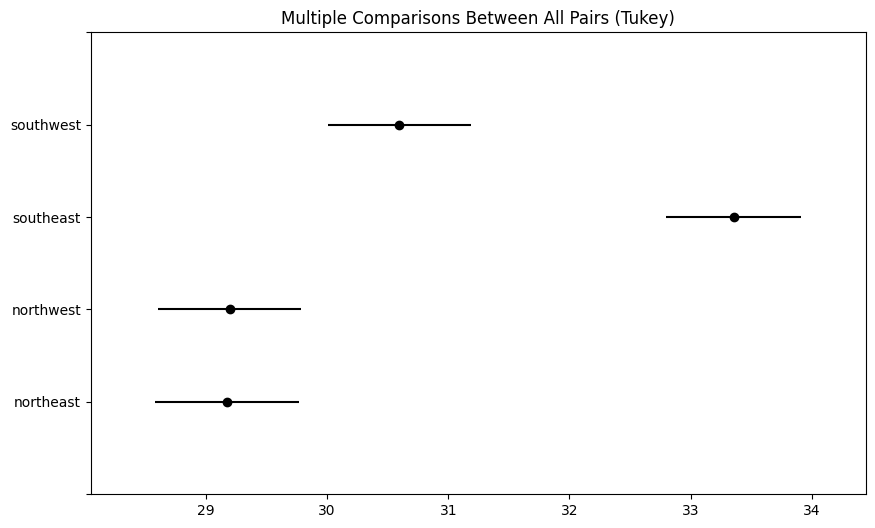

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=data_region_bmi['bmi'],
    groups=data_region_bmi['region'],
    alpha=0.05,
)
tukey.plot_simultaneous()
tukey.summary()

## Задание 6

Выполнить двухфакторный ANOVA тест, чтобы проверить влияние **региона и пола** на **индекс массы тела** (BMI), используя функцию `anova_lm()` из библиотеки `statsmodels`.

In [20]:
data_rs_bmi = data[['region', 'sex', 'bmi']]
data_rs_bmi

,region,sex,bmi
0,southwest,female,27.900
1,southeast,male,33.770
2,southeast,male,33.000
3,northwest,male,22.705
4,northwest,male,28.880
...,...,...,...
1333,northwest,male,30.970
1334,northeast,female,31.920
1335,southeast,female,36.850
1336,southwest,female,25.800


In [21]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data_rs_bmi).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(region),4036.141807,3.0,39.381780,2.215903e-24
C(sex),85.359929,1.0,2.498643,1.141824e-01
C(region):C(sex),175.040197,3.0,1.707917,1.635099e-01
Residual,45401.980965,1329.0,NaN,NaN


## Задание 7

Выполнить пост-хок тесты Тьюки и построить график.

In [22]:
data_rs_bmi['combination'] = data_rs_bmi['region'] + ' / ' + data_rs_bmi['sex']
data_rs_bmi

,region,sex,bmi,combination
0,southwest,female,27.900,southwest / female
1,southeast,male,33.770,southeast / male
2,southeast,male,33.000,southeast / male
3,northwest,male,22.705,northwest / male
4,northwest,male,28.880,northwest / male
...,...,...,...,...
1333,northwest,male,30.970,northwest / male
1334,northeast,female,31.920,northeast / female
1335,southeast,female,36.850,southeast / female
1336,southwest,female,25.800,southwest / female


group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2713,1.6718,False
northeast / female,northwest / female,-0.0464,1.0,-2.0149,1.9222,False
northeast / female,northwest / male,-0.2133,1.0,-2.194,1.7674,False
northeast / female,southeast / female,3.3469,0.0,1.4093,5.2846,True
northeast / female,southeast / male,4.6657,0.0,2.7627,6.5686,True
northeast / female,southwest / female,0.7362,0.9498,-1.2384,2.7107,False
northeast / female,southwest / male,1.8051,0.101,-0.1664,3.7767,False
northeast / male,northwest / female,0.2534,0.9999,-1.709,2.2159,False
northeast / male,northwest / male,0.0864,1.0,-1.8882,2.0611,False
northeast / male,southeast / female,3.6467,0.0,1.7153,5.5782,True


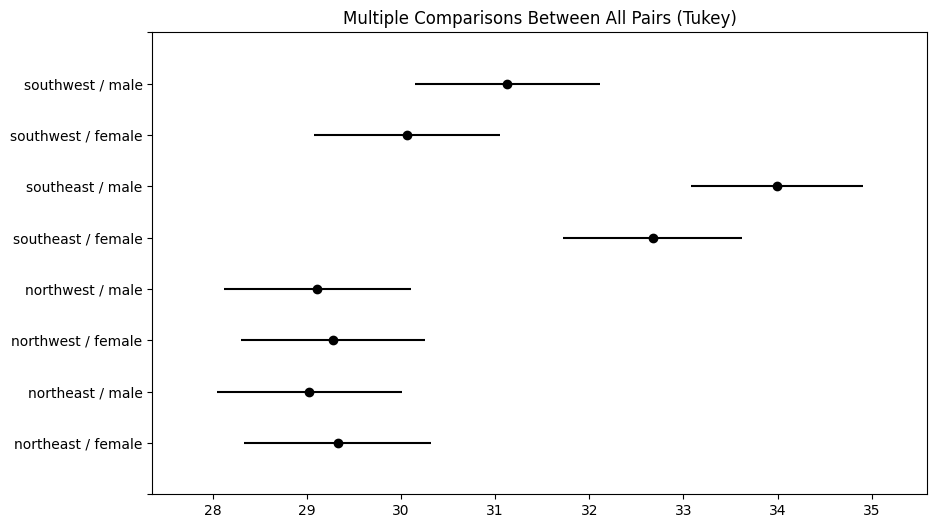

In [23]:
tukey = pairwise_tukeyhsd(
    endog=data_rs_bmi['bmi'],
    groups=data_rs_bmi['combination'],
    alpha = 0.05,
)
tukey.plot_simultaneous()
tukey.summary()